# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Alpha Beta Filter
***

Referring to Section 9.1.1, the alpha-beta filter, is a simplified filter for parameter estimation and smoothing.  The alpha-beta filter is related to Kalman filters but does not require a detailed system model.  It presumes that the system is approximated by two internal states.  The first state is determined by integrating the second state over time.  The radar measurements are the observations of the first model state.  This is a low-order approximation and may be adequate for simple tracking problems, such as tracking a target's position where the position is found from the time integral of the velocity.  Assuming the velocity remains fixed over the time interval between measurements, the position is projected forward in time to predict its value at the next sampling time.

The Python sample code for the alpha beta filter is given in Listing 9.1
***

Set the start, step and end times (s)

In [1]:
start = 0.0

end = 20.0

step = 0.1

Calculate the number of updates and create the time array with the `linspace` routine from `scipy`

In [2]:
from numpy import linspace

number_of_updates = round( (end - start) / step) + 1

t, dt = linspace(start, end, number_of_updates, retstep=True)

Set the initial position (m) and initial velocity (m/s)

In [3]:
initial_position = 5.0

initial_velocity = 0.5

Set the noise variance and the factors (alpha, beta) for the filter

In [4]:
noise_variance = 2.0

alpha = 0.1

beta = 0.001

Calculate the true position

In [5]:
x_true = initial_position + initial_velocity * t

Create the measurements using the random number routines from `scipy`

In [6]:
from numpy import random, sqrt

z = x_true + sqrt(noise_variance) * (random.rand(number_of_updates) - 0.5)

Initialize the state and create the empty filter estimates

In [7]:
xk_1 = 0.0

vk_1 = 0.0


x_filt = []

v_filt = []

r_filt = []

Perform the alpha-beta filtering

In [8]:
# Loop over all measurements

for zk in z:

    # Predict the next state

    xk = xk_1 + vk_1 * dt

    vk = vk_1


    # Calculate the residual

    rk = zk - xk


    # Correct the predicted state

    xk += alpha * rk

    vk += beta / dt * rk


    # Set the current state as previous

    xk_1 = xk

    vk_1 = vk


    x_filt.append(xk)

    v_filt.append(vk)

    r_filt.append(rk)

Display the results of the alpha beta filter using the `matplotlib` routines

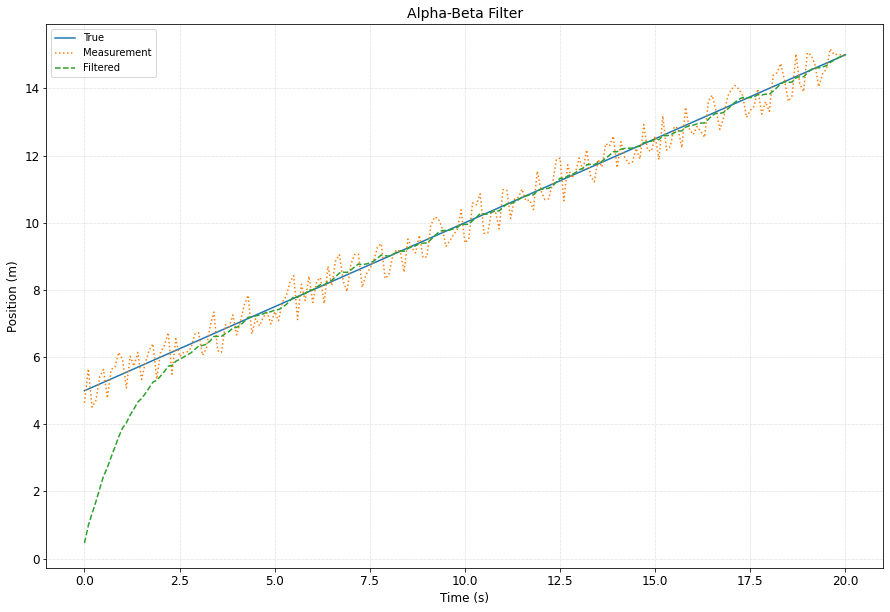

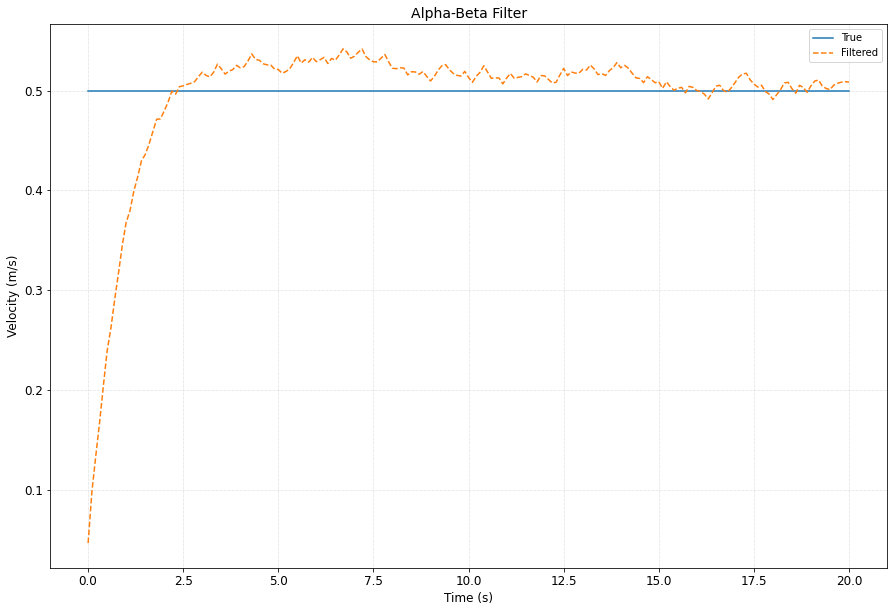

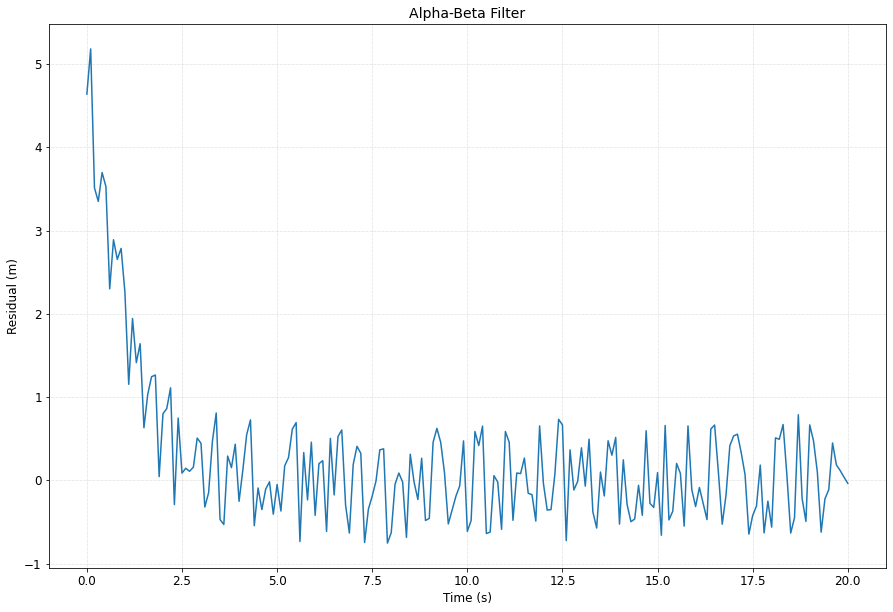

In [9]:
from matplotlib import pyplot as plt

from numpy import ones_like


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Position

plt.figure()

plt.plot(t, x_true, '', label='True')

plt.plot(t, z, ':', label='Measurement')

plt.plot(t, x_filt, '--', label='Filtered')

plt.ylabel('Position (m)', size=12)

plt.legend(loc='best', prop={'size': 10})

# Set the plot title and labels

plt.title('Alpha-Beta Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Velocity
    
plt.figure()

plt.plot(t, initial_velocity * ones_like(t), '', label='True')

plt.plot(t, v_filt, '--', label='Filtered')

plt.ylabel('Velocity (m/s)', size=12)

plt.legend(loc='best', prop={'size': 10})


# Set the plot title and labels

plt.title('Alpha-Beta Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Residual

plt.figure()

plt.plot(t, r_filt, '')

plt.ylabel('Residual (m)', size=12)


# Set the plot title and labels

plt.title('Alpha-Beta Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)